# Pairwise Query Similarity with Jaccard Similarity

The aim of this experiment is to find similar descriptions from the pool of descriptions present to the given input. This can be achieved in many ways and the main four ways experimented here are: 

        - Calculating Jaccard Similarity between entity classes. 
        - Using Word2Vec embeddings and Cosine similarity between descriptions 
        - Using sentence transformers for the caluclation of similarities. 

- This notebook in particular deals with <b> Calculating Cosine Similarity using sentence transformers.</b> 

- It also contains the description about how many top 3 similar queries have the same decade and author. <b>(Task for the DSTrack)</b>

- There is also a runtime measurement that has been done with respect to these queries. 







Importing Libraries necessary

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import pickle 
import time
import seaborn as sns

from nltk.tokenize import word_tokenize 

from scipy.spatial import distance

### The Dataset

The Different Attributes in the dataset are: 
- id : text 
- Artist : text 
- Album : text 
- Decade : text 
- Sales_total : number 
- Sales_US : number
- <b>Description : Text</b>

In [2]:
dataset = pd.read_csv('../data/preprocessed.csv') 
dataset.head(3)


,id,artist,album,decade,sales_total,sales_us,description,author
0,25-the-beatles-sgt-pepper-s-lonely-hearts-club...,The Beatles,Sgt. Pepper’s Lonely Hearts Club Band,60s,1800000,1100000,decade defined sweeping cultural paradigm shif...,Max Blau
1,24-pink-floyd-the-wall,Pink Floyd,The Wall,70s,1800000,1100000,legacy pink floyd cemented dark side moon . wa...,Clint Alwahab
2,23-michael-jackson-bad,Michael Jackson,Bad,80s,1900000,1000000,bizarre consider album five consecutive number...,Josh Jackson


In [67]:
description = list(dataset['description'])

### Sentence Transformers 

While word2vec calculates the word embedding based on how words are semantically near, sentence transformers tend to calculate the vectors based on the semantic placement of words in sentences. 

The sentence transfomer model used here is the multi-qa-MiniLM model that has been trained on question answer pairs. 

In [68]:
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('multi-qa-MiniLM-L6-cos-v1')

#### Cosine similarity calculation to measure similarity 

Just like cosine similarity calculated using word2vec embeddings, sentence transformers are used to get the embeddings to calculate the similarity between descriptions 

In [69]:
def cosine_similarity_score(description1, description2):
    embeddings1 = model.encode(description1, convert_to_tensor=True)
    embeddings2 = model.encode(description2, convert_to_tensor=True)
    
    cosine_scores = util.cos_sim(embeddings1, embeddings2)

    

    return cosine_scores
def index_similarity_matrix(similarity_matrix):
    indiced_list = []
    for i in range(0,len(similarity_matrix)):
        indiced_list.append((similarity_matrix, i))
    
    return indiced_list
    

In [70]:
''''
Calculating the Cosine Similarity Scores for all the descriptions. 
Time Taken for the comparisons and calculations of similarity is measured too.
'''

start = time.time()
cosine_similarity_matrix = cosine_similarity_score(description, description)
end = time.time()
print("Runtime Value for Cosine Similarity Comparisons using sentence-transformers: ", round(end-start, 3), ' seconds')

Runtime Value for Cosine Similarity Comparisons using sentence-transformers:  0.781  seconds


This is how the cosine similarity matrix calculated using sentence transformers looks like 

In [71]:
dataframe = pd.DataFrame(cosine_similarity_matrix)
dataframe.head(3) 

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.000000,0.419216,0.318607,0.140613,0.292977,0.362418,0.381106,0.318956,0.216750,0.180031,...,0.336680,0.303355,0.296327,0.273890,0.292905,0.337997,0.302011,0.254539,0.268337,0.285982
1,0.419216,1.000000,0.322432,0.278901,0.361790,0.388053,0.342064,0.341412,0.242297,0.125636,...,0.385927,0.253370,0.381298,0.304698,0.313728,0.462597,0.269215,0.258122,0.313710,0.362993
2,0.318607,0.322432,1.000000,0.232726,0.445529,0.333952,0.547467,0.457730,0.155537,0.160747,...,0.398283,0.238538,0.338841,0.374886,0.407920,0.487965,0.425737,0.469572,0.316428,0.518388


In [72]:
def get_top_3(cosine_value_list):
    '''
    Takes in the cosine similarity value list
    Returns the index of the top 3 similar queries
    '''
    
    #Create indiced list 
    indiced_list = []
    for i in range(len(cosine_value_list)):
        indiced_list.append((float(cosine_value_list[i]), i))

    cosine_value_list = sorted(indiced_list)
    cosine_value_list = cosine_value_list[len(cosine_value_list)-3:]
    indices = [ value[1] for value in cosine_value_list]
    return indices

def check_similar_authors(similar_query_indices):
    '''
    Takes the indices of the top 3 similar queries
    Returns the percentage of similar authors
    '''

    if dataset.iloc[similar_query_indices[0]].author == dataset.iloc[similar_query_indices[1]].author == dataset.iloc[similar_query_indices[2]].author:
        return 3/3 
    if dataset.iloc[similar_query_indices[1]].author == dataset.iloc[similar_query_indices[2]].author or dataset.iloc[similar_query_indices[2]].author == dataset.iloc[similar_query_indices[0]].author or dataset.iloc[similar_query_indices[1]].author == dataset.iloc[similar_query_indices[0]].author:
        return 2/3
    return 0/3
    
def check_similar_decade(similar_query_indices):
    '''
    Takes the indices of the top 3 similar queries 
    Returns the percentage of similar decades
    '''
      
    if dataset.iloc[similar_query_indices[0]].decade == dataset.iloc[similar_query_indices[1]].decade == dataset.iloc[similar_query_indices[2]].decade:
        return 3/3
    if dataset.iloc[similar_query_indices[1]].decade == dataset.iloc[similar_query_indices[2]].decade or dataset.iloc[similar_query_indices[2]].decade == dataset.iloc[similar_query_indices[0]].decade or dataset.iloc[similar_query_indices[0]].decade == dataset.iloc[similar_query_indices[1]].decade:
        return 2/3
  
    
    return 0/3

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.000000,0.419216,0.318607,0.140613,0.292977,0.362418,0.381106,0.318956,0.216750,0.180031,...,0.336680,0.303355,0.296327,0.273890,0.292905,0.337997,0.302011,0.254539,0.268337,0.285982
1,0.419216,1.000000,0.322432,0.278901,0.361790,0.388053,0.342064,0.341412,0.242297,0.125636,...,0.385927,0.253370,0.381298,0.304698,0.313728,0.462597,0.269215,0.258122,0.313710,0.362993
2,0.318607,0.322432,1.000000,0.232726,0.445529,0.333952,0.547467,0.457730,0.155537,0.160747,...,0.398283,0.238538,0.338841,0.374886,0.407920,0.487965,0.425737,0.469572,0.316428,0.518388


In [73]:
#Getting the top 3 most similar queries for each description.  
get_top_3_indices = [get_top_3(cosine_similarity_matrix[i]) for i in range(len(cosine_similarity_matrix))] 

#Getting the percentage of same authors  in the top 3 most similar albums (based on description)
same_author_percentage = [check_similar_authors(index) for index in get_top_3_indices]

#Getting the percentage of same decade for top 3 most similar album (based on description)
same_decade_percentage = [check_similar_decade(index) for index in get_top_3_indices]


In [80]:
#Getting the top 3 most similar queries for each description.  
get_top_3_indices = [get_top_3(cosine_similarity_matrix[i]) for i in range(len(cosine_similarity_matrix))] 

#Getting the percentage of same authors  in the top 3 most similar albums (based on description)
same_author_percentage = [check_similar_authors(index) for index in get_top_3_indices]

#Getting the percentage of same decade for top 3 most similar album (based on description)
same_decade_percentage = [check_similar_decade(index) for index in get_top_3_indices]

 

### Visualization of Results of percentage of same decades and authors within top 3 most similar queries

##### Histogram to understand the distribution of queries that had 1author similar in the top 3 queries, 2 authors similar in the top 3 queries 

Text(0, 0.5, 'Frequency')

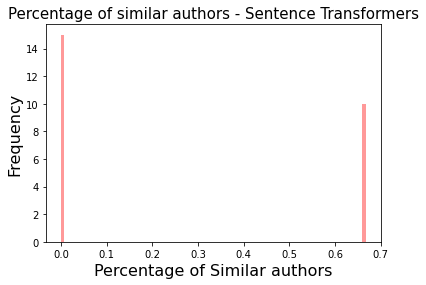

In [82]:

hplot = sns.distplot(same_author_percentage, kde=False, color='red', bins=100)
plt.title('Percentage of similar authors - Sentence Transformers', fontsize=15)
plt.xlabel('Percentage of Similar authors', fontsize=16)
plt.ylabel('Frequency' , fontsize=16)


> It can be observed that:
- 15 albums have their top 3 albums not having any similar author values between then. 
- 10 albums have 2 of the values in their top 3 albums having the same author values between them 

##### Histogram to understand the distribution of queries that had 1 decade similar in the top 3 queries, 2 decades similar in the top 3 queries 

/home/vishnu/anaconda3/envs/music-album-similarity/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

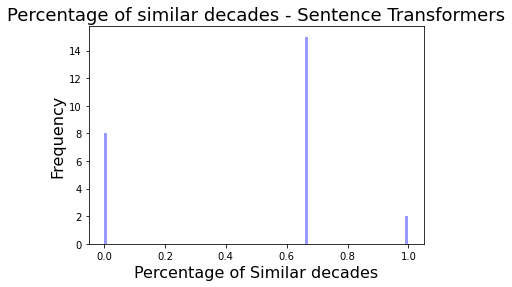

In [84]:
hplot = sns.distplot(same_decade_percentage, kde=False, color='blue', bins=100)
plt.title('Percentage of similar decades - Sentence Transformers', fontsize=18)
plt.xlabel('Percentage of Similar decades', fontsize=16)
plt.ylabel('Frequency' , fontsize=16)

> It can be observed that, 
- 8 albums have their top 3 albums belonging to different decades. 
- 15 albums have their 2 of the top 3 albums having the same decade. 
- 2 albums have all their top 3 albums all from the same decade 